### Daniel Hernandez
## CSC 217 - Spring 2019  - Final Project

For my project, I will explore the change in forest fire frequency and intensity in the state of California from the years 1980 to 2010. I want to identify which years have had the biggest amount of recorded fires and lowest amount of recorded fires and see which years have had the highest and lowest average in acres burnt. In addition, I will also look to see if there is a statistically significant relationship between the number of annual recorded forest fires of the decade 1980-1989 and the decade 2000-2010.

The data that I will be using is data I have collected from the Federal Fire Occurence Website, located [here](https://wildfire.cr.usgs.gov/firehistory/data.html). I have created csv files from the shapefiles given here, so the data should require minimal cleaning. 

In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats
%matplotlib inline

In [86]:
firedata=pd.read_csv('CA Annual FC and TC.csv',header=0)
firedata.head()

,Year,Total,TotalAcres,Avg Temp,Max Temp
0,1980,159,75326.5,32.47,43.0
1,1981,182,113814.7,33.13,42.9
2,1982,182,39108.2,31.20,41.7
3,1983,186,49876.2,31.64,42.3
4,1984,230,109025.6,32.18,41.7


### Exploratory Analysis

First I'll do some exploratory analysis of annual recorded fires and annual total acres burnt.

Text(0.5, 0.92, 'Frequency of Annual Recorded Forest Fires in the State of California 1980-2016')

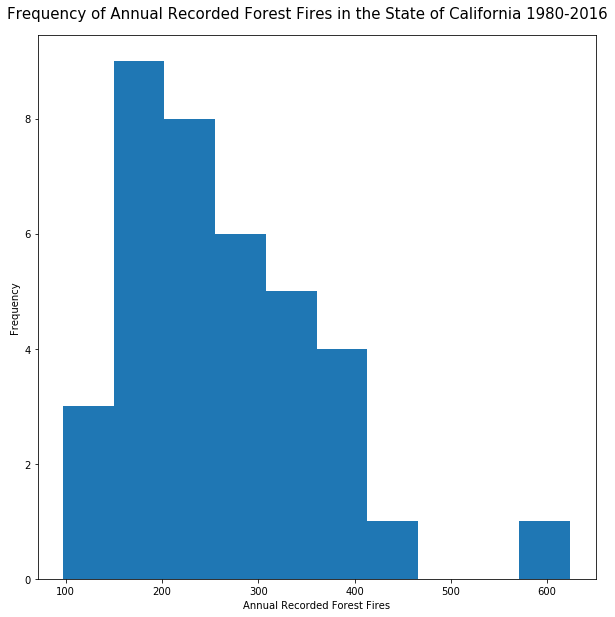

In [87]:
fig = plt.figure(figsize=(10,10))
plt.hist(firedata["Total"])
plt.xlabel("Annual Recorded Forest Fires")
plt.ylabel("Frequency")
fig.suptitle("Frequency of Annual Recorded Forest Fires in the State of California 1980-2016", fontsize=15, y=0.92)

Text(0.5, 0.92, 'Frequency of Annual Recorded Forest Fires in the State of California 1980-2016')

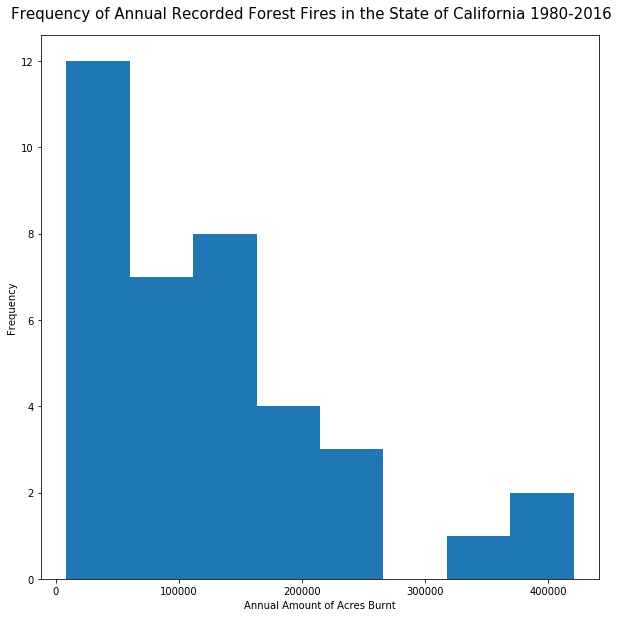

In [88]:
fig = plt.figure(figsize=(10,10))
plt.hist(firedata["TotalAcres"],bins=8)
plt.xlabel("Annual Amount of Acres Burnt")
plt.ylabel("Frequency")
fig.suptitle("Frequency of Annual Recorded Forest Fires in the State of California 1980-2016", fontsize=15, y=0.92)

Text(0.5, 0.92, 'Frequency of Annual Recorded Forest Fires in the State of California 1980-2016')

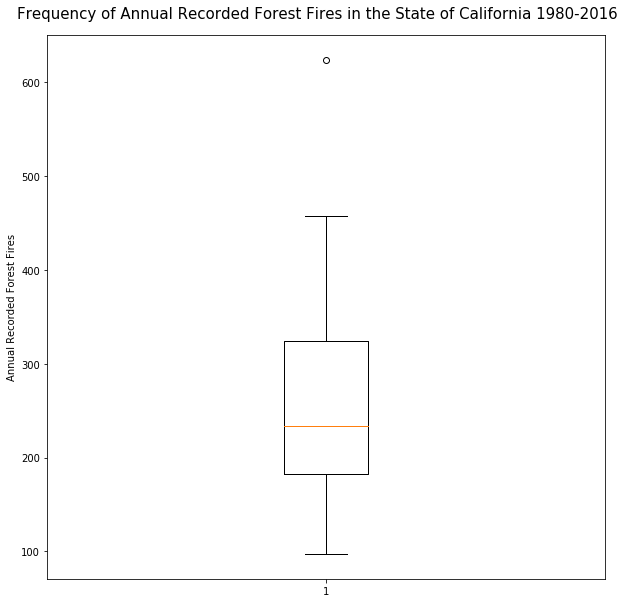

In [89]:
fig = plt.figure(figsize=(10,10))
plt.boxplot(firedata['Total'])
plt.ylabel("Annual Recorded Forest Fires")
fig.suptitle("Frequency of Annual Recorded Forest Fires in the State of California 1980-2016", fontsize=15, y=0.92)

Text(0.5, 0.92, 'Frequency of Annual Acres Burnt in the State of California 1980-2016')

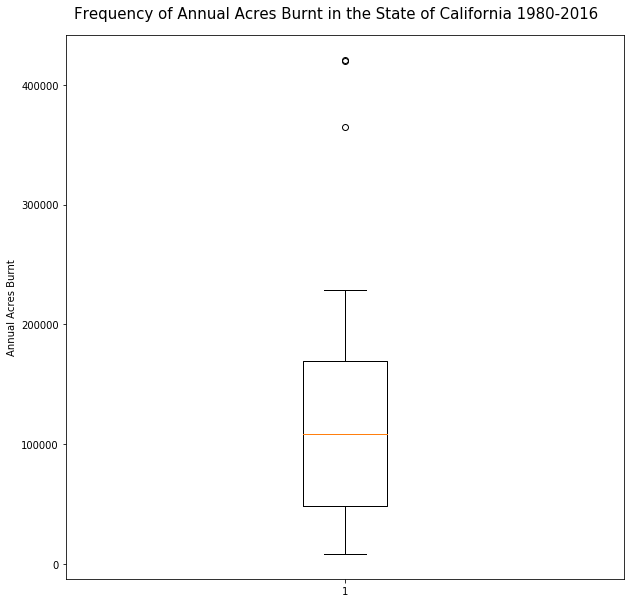

In [90]:
fig = plt.figure(figsize=(10,10))
plt.boxplot(firedata['TotalAcres'])
plt.ylabel("Annual Acres Burnt")
fig.suptitle("Frequency of Annual Acres Burnt in the State of California 1980-2016", fontsize=15, y=0.92)

In [91]:
#Means
print(firedata['Total'].mean())
print(firedata['TotalAcres'].mean())

263.86486486486484
129249.22702702704


In [92]:
#Maximums
print(firedata['Total'].max())
print(firedata['TotalAcres'].max())

624
420707.2


In [93]:
#Minimums
#Maximums
print(firedata['Total'].min())
print(firedata['TotalAcres'].min())

97
8441.1


In [94]:
#Variance
print(firedata['Total'].var())
print(firedata['TotalAcres'].var())

11627.50900900901
10539968970.503136


In [95]:
#Range
firedata[['Total', 'TotalAcres']].max() - firedata[['Total', 'TotalAcres']].min()

Total            527.0
TotalAcres    412266.1
dtype: float64

In [96]:
#Interquartile Range
firedata[['Total', 'TotalAcres']].quantile(q=0.75) - firedata[['Total', 'TotalAcres']].quantile(q=0.25)

Total            142.0
TotalAcres    121120.9
dtype: float64

In [97]:
#Outliers for Recorded Fires
FC_Outliers=np.percentile(firedata['Total'], q=75) + (np.percentile(firedata['Total'], q=75) - np.percentile(firedata['Total'], q=25)) * 1.5
firedata[firedata['Total']>=FC_Outliers]

,Year,Total,TotalAcres,Avg Temp,Max Temp
16,1996,624,420707.2,33.48,43.5


In [98]:
#Outliers for Acres Burnt
Acres_Outliers=np.percentile(firedata['TotalAcres'], q=75) + (np.percentile(firedata['TotalAcres'], q=75) - np.percentile(firedata['TotalAcres'], q=25)) * 1.5
firedata[firedata['TotalAcres']>=Acres_Outliers]

,Year,Total,TotalAcres,Avg Temp,Max Temp
16,1996,624,420707.2,33.48,43.5
27,2007,324,365000.1,32.03,42.2
32,2012,161,419495.3,32.59,42.0


So what does this data all mean? Looking at the histogram and boxplots, we can see that most years have around 260 annual forest fires. The majority of these years also experience around 120,000 total acres burnt. These numbers seem to vary greatly, some years reporting as low as 97 fires while others report numbers over 400, with an outlier at 624 annual recorded forest fires. The Acres Burnt distribution has 3 outliers all 3 of them having over 300,000 acres burnt.

### Relationship Between Number of Recorded Forest Fires and Acres Burnt

Next I'll explore the relationship between number of fires in a year and acres burnt during that year.

In [99]:
def evaluate_linear_relationship(a, b):
    slope = np.cov(a, b, bias=True)[0][1] / np.var(a)
    intercept = np.mean(b) - (slope * np.mean(a))
    predictions = (slope * a) + intercept
    residuals = b - predictions
    return slope, intercept, predictions, residuals

In [100]:
slope, intercept, predictions, residuals = evaluate_linear_relationship(firedata['Total'],
                                                                        firedata['TotalAcres'])

Text(0.5, 0.92, 'Annual Recorded Forest Fires Vs. Annual Acres Burnt in California 1980-2016')

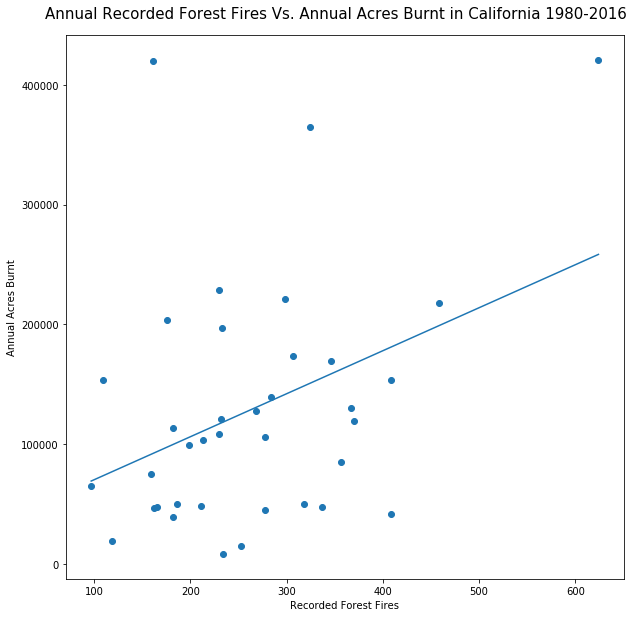

In [101]:
fig = plt.figure(figsize=(10,10))
plt.scatter(firedata['Total'],firedata['TotalAcres'])
sorted_order = np.argsort(firedata['Total'])
plt.plot(firedata['Total'][sorted_order], predictions[sorted_order])
plt.ylabel("Annual Acres Burnt")
plt.xlabel("Recorded Forest Fires")
fig.suptitle("Annual Recorded Forest Fires Vs. Annual Acres Burnt in California 1980-2016", fontsize=15, y=0.92)

In [102]:
#R-Squared Value
np.var(predictions) / np.var(firedata['TotalAcres'])

0.1420099170954517

Text(0.5, 0.92, 'Residuals')

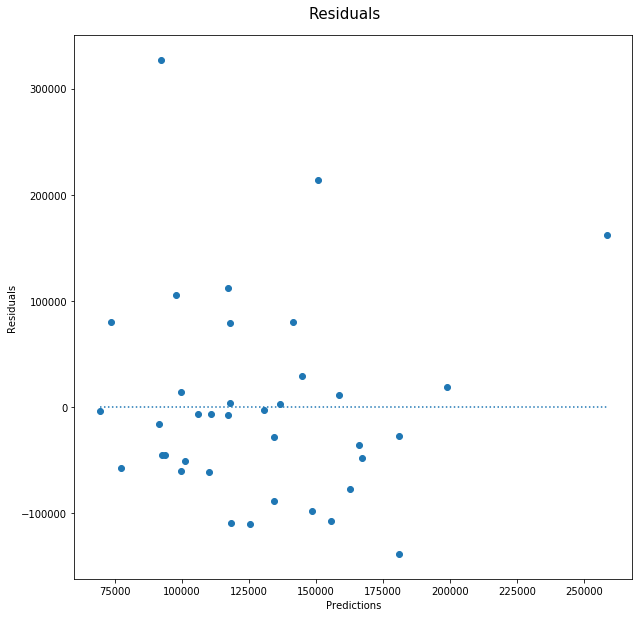

In [103]:
fig = plt.figure(figsize=(10,10))
plt.scatter(predictions, residuals)
plt.plot([predictions.min(), predictions.max()], [0,0], linestyle='dotted')
plt.xlabel("Predictions")
plt.ylabel('Residuals')
fig.suptitle('Residuals', fontsize=15, y=0.92)

The relationship between the annual number of fires and the annual number of acres burnt for the past 3 decades seems to near non-existant. With a R-squared value of 14%, the predicitve linear model is unreliable.

### Exploring Data by Year

In [104]:
#Top 5 Fire Counts
firedata.sort_values('Total', ascending=False).head()

,Year,Total,TotalAcres,Avg Temp,Max Temp
16,1996,624,420707.2,33.48,43.5
19,1999,458,217744.6,31.45,40.1
8,1988,408,153780.8,32.63,43.2
9,1989,408,41962.8,33.02,43.4
21,2001,370,119407.3,31.78,41.0


In [105]:
#Top 5 Acres Burnt
firedata.sort_values('TotalAcres', ascending=False).head()

,Year,Total,TotalAcres,Avg Temp,Max Temp
16,1996,624,420707.2,33.48,43.5
32,2012,161,419495.3,32.59,42.0
27,2007,324,365000.1,32.03,42.2
5,1985,230,228741.3,31.83,43.2
26,2006,298,221415.7,32.23,43.6


In [106]:
#Bottom 5 Fire Counts
firedata.sort_values('Total', ascending=True).head()

,Year,Total,TotalAcres,Avg Temp,Max Temp
36,2016,97,65037.7,33.11,42.3
35,2015,109,153860.9,33.18,42.5
34,2014,119,19757.0,33.55,42.8
0,1980,159,75326.5,32.47,43.0
32,2012,161,419495.3,32.59,42.0


In [107]:
#Bottom 5 Acres Burnt
firedata.sort_values('TotalAcres', ascending=True).head()

,Year,Total,TotalAcres,Avg Temp,Max Temp
11,1991,234,8441.1,31.49,41.1
6,1986,253,15111.5,32.58,42.0
34,2014,119,19757.0,33.55,42.8
2,1982,182,39108.2,31.20,41.7
9,1989,408,41962.8,33.02,43.4




Looking at annual recorded forest fire count and acres burnt over the years chronologically can give us a better sense of any established trends over the past 3 decades:

Text(0.5, 0.92, 'Recorded Forest Fires in the State of California 1980-2016')

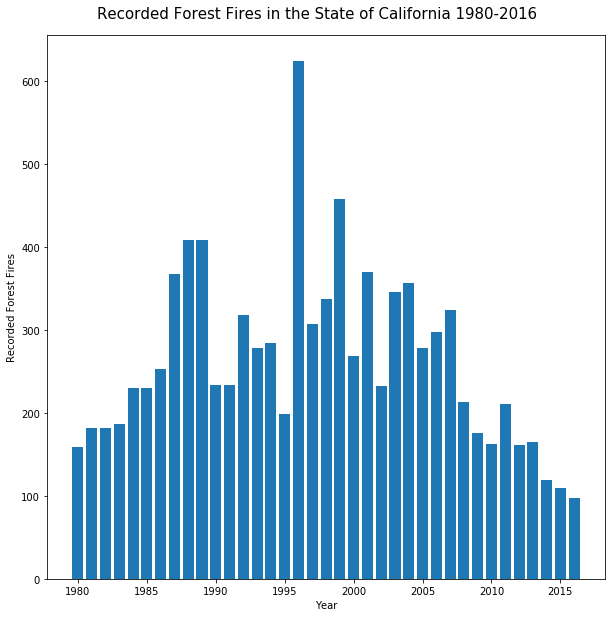

In [108]:
fig = plt.figure(figsize=(10,10))
plt.bar(firedata['Year'],firedata['Total'])
plt.ylabel("Recorded Forest Fires")
plt.xlabel("Year")
fig.suptitle("Recorded Forest Fires in the State of California 1980-2016", fontsize=15, y=0.92)

Text(0.5, 0.92, 'Annual Amount of Acres Burnt in the State of California 1980-2016')

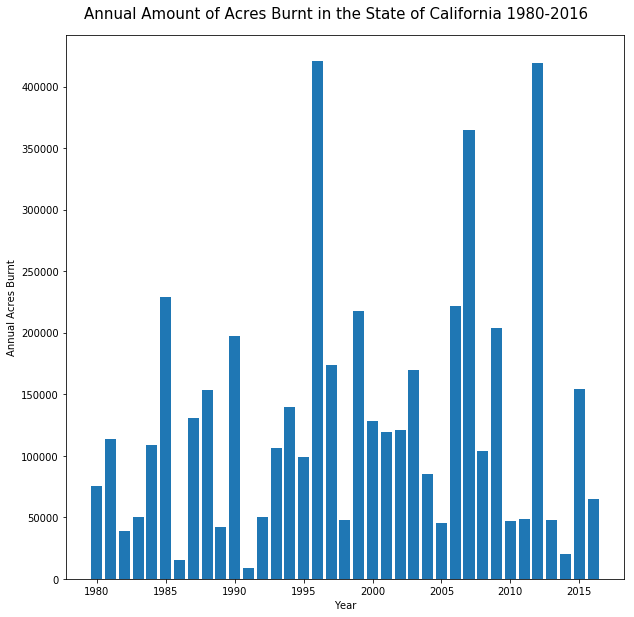

In [109]:
fig = plt.figure(figsize=(10,10))
plt.bar(firedata['Year'],firedata['TotalAcres'])
plt.ylabel("Annual Acres Burnt")
plt.xlabel("Year")
fig.suptitle("Annual Amount of Acres Burnt in the State of California 1980-2016", fontsize=15, y=0.92)

Looking at the number of recorded forest fires over the years, we can see a slight increase to 300 annual recorded forest fires in the late 1990's, and then a decrease to around 100 recorded fires as of recent years.

The graph displaying the total acres shows no obvious trend or pattern. Something I can check in the future is too look into why a year with a high number of acres burnts  mostly results in the following year having a much lower number of acres burnt. My educated guess would be that so much area is burnt that smallers fires that occur don't have as much landcover to work it as it was burnt the year prior.

### Examining the Relationship Between 1980's Firecount and 2000's Firecount

Let's organize our data by categorizing it by decade:

In [112]:
FC_1980=firedata[firedata['Year'] <= 1989]['Total']
FC_2000=firedata.loc['20':'29']['Total']

Text(0.5, 0.92, "Difference in FireCount in the 1980's and the 2000's")

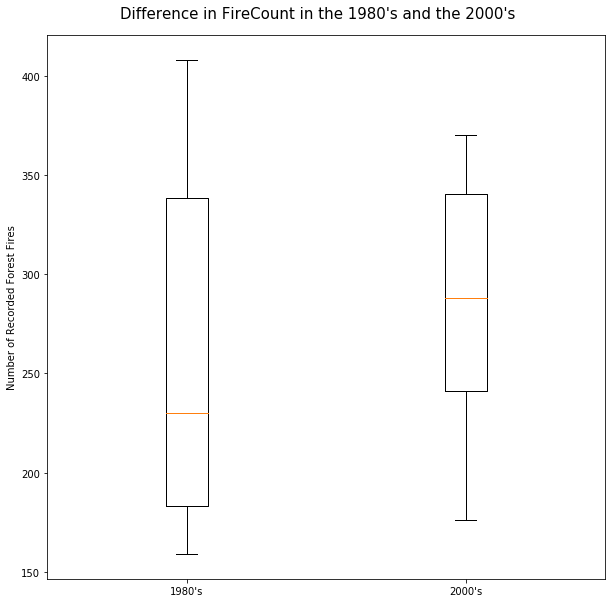

In [113]:
fig = plt.figure(figsize=(10,10))
plt.boxplot([FC_1980,FC_2000])
plt.xticks([1,2], ["1980's", "2000's"])
plt.ylabel("Number of Recorded Forest Fires")
fig.suptitle("Difference in FireCount in the 1980's and the 2000's", fontsize=15, y=0.92)

In [114]:
FC_1980.mean()

260.5

In [61]:
FC_2000.mean()

286.2

In [63]:
FC_2000.mean()-FC_1980.mean()

25.69999999999999

We can use hypothesis testing to answer the question stated in our introduction - Is there a statistically signifcant difference between the number of recorded forest fires in the 1980 decade and the 2000 decade?

The null hypothesis is that there is no statistically significant difference in the number of recorded forest fires in the 1980 decade and the 2000 decade. The alternative hypothesis is that there is a statistically signifcant difference in the number of recorded forest fires in the 1980 decade and the 2000 decade. This will be a one-sided test at a significance level of 0.05, meaning that we will reject the observed difference(25.69) if it's above the 95th percentile.  

Text(0.5, 0.92, 'Bootstrapped Differences in Gain in Education Rate Between 2000 and 2015')

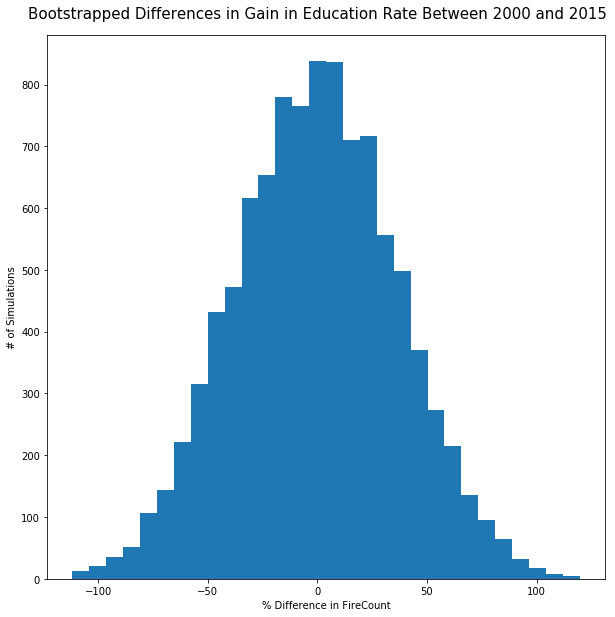

In [69]:
np.random.seed(42)
diff = []
for i in range(10000):
    total = np.concatenate((FC_1980,FC_2000), axis=None)
    np.random.shuffle(total)
    new_1980 = total[:len(FC_2000)]
    new_2000 = total[len(FC_2000):]
    diff.append(np.mean(new_1980) - np.mean(new_2000))
fig = plt.figure(figsize=(10,10))
plt.hist(diff, bins=30);
plt.xlabel("% Difference in FireCount")
plt.ylabel("# of Simulations")
fig.suptitle("Bootstrapped Differences in Gain in Education Rate Between 2000 and 2015", fontsize=15, y=0.92)

In [66]:
np.percentile(diff, 95)

59.909999999999854

In [67]:
stats.percentileofscore(diff, 25.69999999999999)

75.875

The observed difference of 25.69 lies in the 75th percentile of the 10,000 simulated values. This means that we can accept the null hypothesis that there is no statistically significant difference in the number of recorded forest fires in the 1980 decade and the 2000 decade.

### Conclusion

In conclusion, we can see through our data visualizations that most years from 1980 to 2016 experience approximately 260 annual forest fires. These fires each year cause around a number of 120,000 total acres to be burned. there is a great deal of variance surrounding these fires, which will need more data and variable to be explained. The relationship between the annual amount of recorded forest fires and the annual amount of acres burnt hold nearly no linear relationship, so we can conclude that it would be unable to say what amount of acres were burnt that year given the amount of recorded fires during that year. Looking at our bootstrap test, we can also conclude that there is no statistical difference between the number of recorded fires in the 1980 decade and the 2000 decade. 